In [32]:
# Import python libraries
import numpy as np
import matplotlib.pyplot as plt 

# Think about the simplest 1D shallow water model

## Mass equation $\frac{\partial h}{\partial t} + \frac{\partial}{\partial x} \left( uh \right) = 0$

## Momentum equation $\frac{\partial \left( hu \right)}{\partial t} + \frac{\partial}{\partial x} \
\left( hu^2 + \frac{1}{2}gh^2\right) = 0$

This set of equations can be converted as
## Mass equation $\frac{\partial h}{\partial t} = - u\frac{\partial h}{\partial x} - h\frac{\partial u}{\partial x}$

## Momentum equation $\frac{\partial u}{\partial t} = - u\frac{\partial u}{\partial x} - g\frac{\partial h}{\partial x}$

In [116]:
class parameters:
    
    # Spatial grid
    dx = 0.1
    x    = np.arange(-3, 3+dx, dx)
    xlen = len(x)           # length of X-grid
    
    # Temporal grid
    dt   = 0.0001 # seconds
    tmin = 0
    tmax = dt * 9e5
    t    = np.arange(tmin,tmax+dt,dt)
    tlen = len(t)
    
    # CFL criterion must be met
    if not dt/dx < 0.4:
        print('CFL criterion is not met.')
        quit()
    
    # Other parameters
    g   = 10     # gravity in m/s^2
    tau = dt*1e20 # friction damping timescale in s

In [117]:
def __init__(self):
    # generate variables and combine them with parameters
    self.h , self.u       \
    = (np.zeros([parameters.tlen,parameters.xlen],dtype='float') for i in range(2))

In [123]:
def get_initial_conditions(h0 = 1.5, u0 = 0):
    
    i = 0
    par.h[i,:]        = 1 + 2/5 * np.exp(-5* par.x**2)
    par.u[i,:]        = np.zeros([par.xlen],dtype='float')   # initial wind

In [45]:
def get_advM(h, u):
    adv = np.zeros([par.xlen],dtype='float')       # (t+1)
    
#     centeral difference + each variable
    for j in range(1, par.xlen-1):
        adv[j] = u[j] * (h[j+1]-h[j-1])/par.dx/2 + h[j] * (u[j+1]-u[j-1])/par.dx/2
    
    adv[0] = u[0] * (h[1]-h[-1])/par.dx/2 + h[0] * (u[1]-u[-1])/par.dx/2
    
    adv[-1] = u[-1] * (h[0]-h[-2])/par.dx/2 + h[-1] * (u[0]-u[-2])/par.dx/2
    
#     # forward difference + all variables
#     for j in range(1, par.xlen-1):
#         if u[j] >=0:
#             adv[j] = (h[j]*u[j] - h[j-1]*u[j-1]) / par.dx
#         else:
#             adv[j] = (h[j+1]*u[j+1] - h[j]*u[j]) / par.dx
    
#     if u[0] >=0:
#         adv[0] = (h[0]*u[0] - h[-1]*u[-1]) / par.dx
#     else:
#         adv[0] = (h[1]*u[1] - h[0]*u[0]) / par.dx
    
#     if u[-1] >=0:
#         adv[-1] = (h[-1]*u[-1] - h[-2]*u[-2]) / par.dx
#     else:
#         adv[-1] = (h[0]*u[0] - h[-1]*u[-1]) / par.dx
            
    return adv

In [46]:
def get_h():
    h = np.zeros([par.xlen],dtype='float')       # (t+1)
    
    advM = get_advM(par.h[i,:],par.u[i,:])
    
    for j in range(0, par.xlen):
        h[j]= par.h[i,j] - par.dt * advM[j]
    return h

In [47]:
def get_advU(h, u, g):
    adv = np.zeros([par.xlen],dtype='float')       # (t+1)
    
    # central difference + each variable  
    for j in range(1, par.xlen-1):
        adv[j] = u[j] * (u[j+1]-u[j-1])/par.dx/2 + g * (h[j+1]-h[j-1])/par.dx/2
    
    adv[0] = u[0] * (u[1]-u[-1])/par.dx/2 + g * (h[1]-h[-1])/par.dx/2
    
    adv[-1] = u[-1] * (u[0]-u[-2])/par.dx/2 + g * (h[0]-h[-2])/par.dx/2
    
    # forward difference + all variables
#     mum = u**2 / 2 + g * h ** 2
    
#     for j in range(1, par.xlen-1):
#         if u[j] >=0:
#             adv[j] = (mum[j] - mum[j-1]) / par.dx
#         else:
#             adv[j] = (mum[j+1] - mum[j]) / par.dx
    
#     if u[0] >=0:
#         adv[0] = (mum[0] - mum[-1]) / par.dx
#     else:
#         adv[0] = (mum[1] - mum[0]) / par.dx
    
#     if u[-1] >=0:
#         adv[-1] = (mum[-1] - mum[-2]) / par.dx
#     else:
#         adv[-1] = (mum[0] - mum[-1]) / par.dx
            
    return adv

In [48]:
def get_u():
    u = np.zeros([par.xlen],dtype='float')       # (t+1)

    advU = get_advU(par.h[i,:], par.u[i,:], par.g)
    
    for j in range(0, par.xlen):
        u[j]= par.u[i,j] - par.dt * advU[j]

    return u

In [124]:
# Time Integration
par = parameters()
__init__(par)
get_initial_conditions()

for i in range(par.tlen-1): 

    # Get variables at the next time step
    par.h[i+1,:]                               = get_h()
    par.u[i+1,:]                               = get_u()
    
    f_report = 10        # report every time when this fraction is completed
    idx = (par.tlen-1)/f_report
    if (i%idx == 0 ):
        progress = round(i/par.tlen*100)
        print("Simulation {} % completed".format(progress))
        
print('Success!')

Simulation 0 % completed
Simulation 10 % completed
Simulation 20 % completed
Simulation 30 % completed
Simulation 40 % completed
Simulation 50 % completed
Simulation 60 % completed
Simulation 70 % completed
Simulation 80 % completed
Simulation 90 % completed


<ipython-input-45-cb67c07f8708>:6: RuntimeWarning: overflow encountered in double_scalars
  adv[j] = u[j] * (h[j+1]-h[j-1])/par.dx/2 + h[j] * (u[j+1]-u[j-1])/par.dx/2
<ipython-input-45-cb67c07f8708>:6: RuntimeWarning: invalid value encountered in double_scalars
  adv[j] = u[j] * (h[j+1]-h[j-1])/par.dx/2 + h[j] * (u[j+1]-u[j-1])/par.dx/2
<ipython-input-47-4e5e1ad4593a>:7: RuntimeWarning: overflow encountered in double_scalars
  adv[j] = u[j] * (u[j+1]-u[j-1])/par.dx/2 + g * (h[j+1]-h[j-1])/par.dx/2
<ipython-input-47-4e5e1ad4593a>:7: RuntimeWarning: invalid value encountered in double_scalars
  adv[j] = u[j] * (u[j+1]-u[j-1])/par.dx/2 + g * (h[j+1]-h[j-1])/par.dx/2


Success!


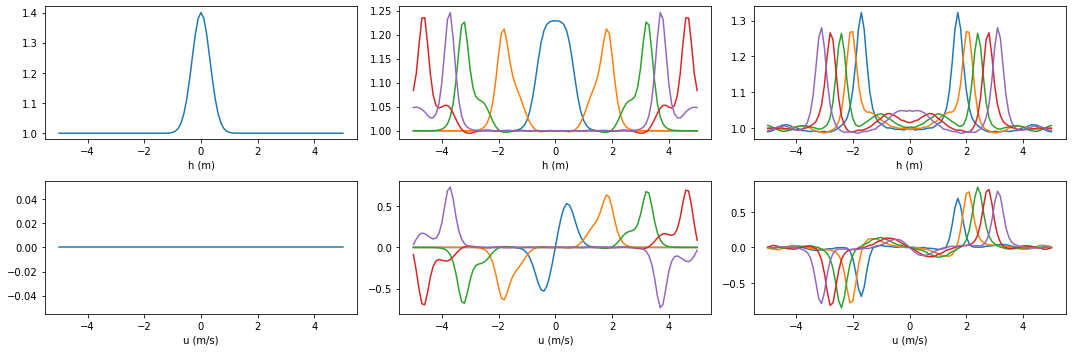

In [105]:
# Plot distribution  
fig, ax = plt.subplots(2,3,figsize=(15,5)) 

# Plot at end of the simulation
ax[0,0].plot(par.x,par.h[0,:]) 
ax[1,0].plot(par.x,par.u[0,:]) 

i = 1000
ax[0,1].plot(par.x,par.h[i,:]) 
ax[1,1].plot(par.x,par.u[i,:])
ax[0,1].plot(par.x,par.h[5000,:]) 
ax[1,1].plot(par.x,par.u[5000,:])
ax[0,1].plot(par.x,par.h[9000,:]) 
ax[1,1].plot(par.x,par.u[9000,:])
ax[0,1].plot(par.x,par.h[13000,:]) 
ax[1,1].plot(par.x,par.u[13000,:])
ax[0,1].plot(par.x,par.h[18000,:]) 
ax[1,1].plot(par.x,par.u[18000,:])


i = 91000
ax[0,2].plot(par.x,par.h[i,:]) 
ax[1,2].plot(par.x,par.u[i,:])
ax[0,2].plot(par.x,par.h[92000,:]) 
ax[1,2].plot(par.x,par.u[92000,:])
ax[0,2].plot(par.x,par.h[93000,:]) 
ax[1,2].plot(par.x,par.u[93000,:])
ax[0,2].plot(par.x,par.h[94000,:]) 
ax[1,2].plot(par.x,par.u[94000,:])
ax[0,2].plot(par.x,par.h[95000,:]) 
ax[1,2].plot(par.x,par.u[95000,:])


for c in range(0,3):    
    ax[0,c].set_xlabel('h (m)')
    ax[1,c].set_xlabel('u (m/s)')
plt.tight_layout()
plt.show()

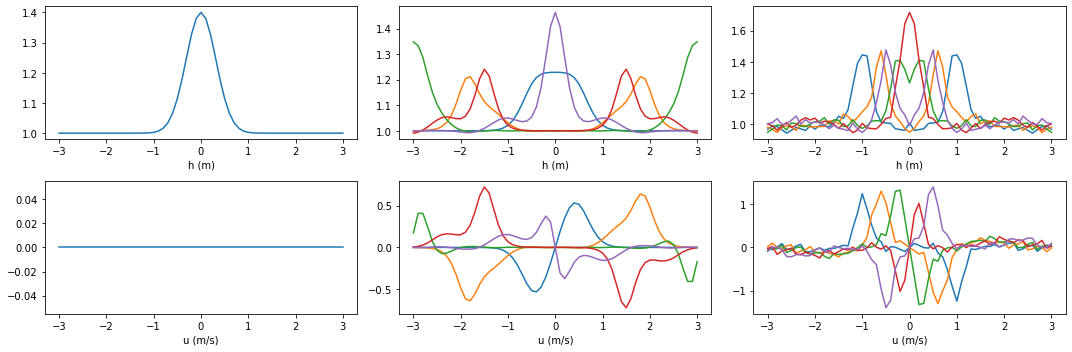

In [130]:
# Plot distribution  
fig, ax = plt.subplots(2,3,figsize=(15,5)) 

# Plot at end of the simulation
ax[0,0].plot(par.x,par.h[0,:]) 
ax[1,0].plot(par.x,par.u[0,:]) 

i = 1000
ax[0,1].plot(par.x,par.h[i,:]) 
ax[1,1].plot(par.x,par.u[i,:])
ax[0,1].plot(par.x,par.h[5000,:]) 
ax[1,1].plot(par.x,par.u[5000,:])
ax[0,1].plot(par.x,par.h[9000,:]) 
ax[1,1].plot(par.x,par.u[9000,:])
ax[0,1].plot(par.x,par.h[13000,:]) 
ax[1,1].plot(par.x,par.u[13000,:])
ax[0,1].plot(par.x,par.h[17000,:]) 
ax[1,1].plot(par.x,par.u[17000,:])


i = 491000
ax[0,2].plot(par.x,par.h[i,:]) 
ax[1,2].plot(par.x,par.u[i,:])
ax[0,2].plot(par.x,par.h[492000,:]) 
ax[1,2].plot(par.x,par.u[492000,:])
ax[0,2].plot(par.x,par.h[493000,:]) 
ax[1,2].plot(par.x,par.u[493000,:])
ax[0,2].plot(par.x,par.h[494000,:]) 
ax[1,2].plot(par.x,par.u[494000,:])
ax[0,2].plot(par.x,par.h[495000,:]) 
ax[1,2].plot(par.x,par.u[495000,:])


for c in range(0,3):    
    ax[0,c].set_xlabel('h (m)')
    ax[1,c].set_xlabel('u (m/s)')
plt.tight_layout()
plt.show()